<a href="https://colab.research.google.com/github/Lilia2022/BirthdayJunnot/blob/main/Project_tried.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [7]:


# Specify the path to your CSV file
dataset_path = 'JustRAIGS_Train_labels.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101423 entries, 0 to 101422
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                        Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                        --------------   ----- 
 0   Eye ID;Final Label;Fellow Eye ID;Age;Label G1;Label G2;Label G3;G1 ANRS;G1 ANRI;G1 RNFLDS;G1 RNFLDI;G1 BCLVS;G1 BCLVI;G1 NVT;G1 DH;G1 LD;G1 LC;G2 ANRS;G2 ANRI;G2 RNFLDS;G2 RNFLDI;G2 BCLVS;G2 BCLVI;G2 NVT;G2 DH;G2 LD;G2 LC;G

In [10]:
# Assuming df is your DataFrame obtained from reading the dataset
# If you haven't already loaded the dataset, refer to the previous example

# Split the single column into multiple columns based on the semicolon delimiter
df_split = df['Eye ID;Final Label;Fellow Eye ID;Age;Label G1;Label G2;Label G3;G1 ANRS;G1 ANRI;G1 RNFLDS;G1 RNFLDI;G1 BCLVS;G1 BCLVI;G1 NVT;G1 DH;G1 LD;G1 LC;G2 ANRS;G2 ANRI;G2 RNFLDS;G2 RNFLDI;G2 BCLVS;G2 BCLVI;G2 NVT;G2 DH;G2 LD;G2 LC;G3 ANRS;G3 ANRI;G3 RNFLDS;G3 RNFLDI;G3 BCLVS;G3 BCLVI;G3 NVT;G3 DH;G3 LD;G3 LC'].str.split(';', expand=True)

# Display the first few rows of the new DataFrame
print(df_split.head())

# Display basic information about the new DataFrame
print(df_split.info())


            0    1            2   3    4    5  6  7  8  9   ... 27 28 29 30  \
0  TRAIN000000  NRG  TRAIN081848  48  NRG  NRG     0  0  0  ...               
1  TRAIN000001  NRG  TRAIN018312  29  NRG  NRG     0  0  0  ...               
2  TRAIN000002  NRG  TRAIN083822  61  NRG  NRG     0  0  0  ...               
3  TRAIN000003  NRG  TRAIN055721  70  NRG  NRG     0  0  0  ...               
4  TRAIN000004  NRG  TRAIN099283  48  NRG  NRG     0  0  0  ...               

  31 32 33 34 35 36  
0                    
1                    
2                    
3                    
4                    

[5 rows x 37 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101423 entries, 0 to 101422
Data columns (total 37 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       101423 non-null  object
 1   1       101423 non-null  object
 2   2       101423 non-null  object
 3   3       101423 non-null  object
 4   4       101423 non-null  object


In [12]:
# columns '3', '6', '7', '8', '9', and others are columns with numerical data
columns_to_convert = [3, 6, 7, 8, 9]  # Add other column names as needed7
# Loop through the specified columns and convert to numeric
for col in columns_to_convert:
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce')  # Using errors='coerce' to handle non-numeric values


In [13]:
# Check for missing values
print(df_split.isnull().sum())


0          0
1          0
2          0
3         14
4          0
5          0
6     101423
7        274
8        274
9        274
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
34         0
35         0
36         0
dtype: int64


In [14]:
# Impute missing values with the mean for numeric columns
df_split.fillna(df_split.mean(), inplace=True)


<ipython-input-14-5be7379f3805>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_split.fillna(df_split.mean(), inplace=True)


In [16]:
# Display the column names of df_split
print(df_split.columns)


RangeIndex(start=0, stop=37, step=1)


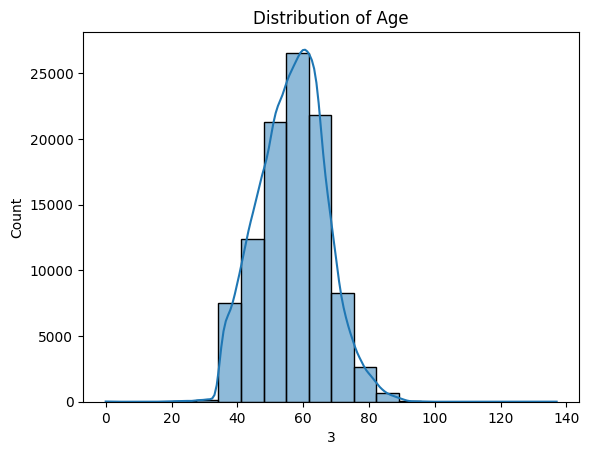

In [21]:
# Explore the distribution of 'Age' using column index 3
sns.histplot(df_split.iloc[:, 3].dropna(), bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()
